In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('./sales_data.csv', encoding='Latin-1')
df.head()

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN          Reims   NaN   
2  27 rue du Colonel Pierre Avia           NaN          Paris   NaN   
3             78934 Hillside Dr.           NaN       Pasadena    CA   
4                7734 Strong St.           NaN  San Francisco    CA   

  POSTALCODE COUNTRY TERRITORY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  
0      10022     USA       NaN              Yu             Kwai    Small  
1      51100  France      EMEA         Henriot             Paul    Small  
2      75508  France      EMEA        Da Cunha           Daniel   Medium  
3      90003     USA       NaN           Young            Julie   Medium  
4        NaN     USA       NaN           Brown            Julie   Medium  

[5 rows x 25 columns]

In [33]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [34]:
df.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [35]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [36]:
for col in df.select_dtypes('object').columns.to_list():
    print(f"no of unique entries in {col} = {len(df[col].unique())}")

no of unique entries in ORDERDATE = 252
no of unique entries in STATUS = 6
no of unique entries in PRODUCTLINE = 7
no of unique entries in PRODUCTCODE = 109
no of unique entries in CUSTOMERNAME = 92
no of unique entries in PHONE = 91
no of unique entries in ADDRESSLINE1 = 92
no of unique entries in ADDRESSLINE2 = 10
no of unique entries in CITY = 73
no of unique entries in STATE = 17
no of unique entries in POSTALCODE = 74
no of unique entries in COUNTRY = 19
no of unique entries in TERRITORY = 4
no of unique entries in CONTACTLASTNAME = 77
no of unique entries in CONTACTFIRSTNAME = 72
no of unique entries in DEALSIZE = 3


In [37]:
for col in df.select_dtypes(include='number').columns.to_list():
    print(f"no of unique entries in {col} = {len(df[col].unique())}")

no of unique entries in ORDERNUMBER = 307
no of unique entries in QUANTITYORDERED = 58
no of unique entries in PRICEEACH = 1016
no of unique entries in ORDERLINENUMBER = 18
no of unique entries in SALES = 2763
no of unique entries in QTR_ID = 4
no of unique entries in MONTH_ID = 12
no of unique entries in YEAR_ID = 3
no of unique entries in MSRP = 80


In [38]:
df['MSRP']

0       95
1       95
2       95
3       95
4       95
        ..
2818    54
2819    54
2820    54
2821    54
2822    54
Name: MSRP, Length: 2823, dtype: int64

In [39]:
cols_to_drop = ['ORDERNUMBER', 'ORDERDATE', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'MSRP',
       'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME']
df.drop(cols_to_drop, axis='columns', inplace=True)

In [40]:
df.head()

QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES   STATUS  QTR_ID  \
0               30      95.70                2  2871.00  Shipped       1   
1               34      81.35                5  2765.90  Shipped       2   
2               41      94.74                2  3884.34  Shipped       3   
3               45      83.26                6  3746.70  Shipped       3   
4               49     100.00               14  5205.27  Shipped       4   

   MONTH_ID  YEAR_ID  PRODUCTLINE TERRITORY DEALSIZE  
0         2     2003  Motorcycles       NaN    Small  
1         5     2003  Motorcycles      EMEA    Small  
2         7     2003  Motorcycles      EMEA   Medium  
3         8     2003  Motorcycles       NaN   Medium  
4        10     2003  Motorcycles       NaN   Medium

In [41]:
df['TERRITORY'].isna().sum()

np.int64(1074)

In [42]:
df['DEALSIZE'].unique()

array(['Small', 'Medium', 'Large'], dtype=object)

In [43]:
df.drop(['TERRITORY'], axis='columns', inplace=True)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

df['DEALSIZE'] = df['DEALSIZE'].replace('Small', 1)
df['DEALSIZE'] = df['DEALSIZE'].replace('Medium', 2)
df['DEALSIZE'] = df['DEALSIZE'].replace('Large', 3)
df['DEALSIZE'] = df['DEALSIZE'].astype('int')

categorical_cols = df.select_dtypes(include='object').columns.to_list()
print(categorical_cols)

['STATUS', 'PRODUCTLINE']


/tmp/ipykernel_62698/15370034.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['DEALSIZE'] = df['DEALSIZE'].replace('Large', 3)


In [44]:
df_encoded = pd.get_dummies(data = df, columns=['STATUS', 'PRODUCTLINE'], drop_first=True)
df_encoded.head()

QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  QTR_ID  MONTH_ID  \
0               30      95.70                2  2871.00       1         2   
1               34      81.35                5  2765.90       2         5   
2               41      94.74                2  3884.34       3         7   
3               45      83.26                6  3746.70       3         8   
4               49     100.00               14  5205.27       4        10   

   YEAR_ID  DEALSIZE  STATUS_Disputed  STATUS_In Process  STATUS_On Hold  \
0     2003         1            False              False           False   
1     2003         1            False              False           False   
2     2003         2            False              False           False   
3     2003         2            False              False           False   
4     2003         2            False              False           False   

   STATUS_Resolved  STATUS_Shipped  PRODUCTLINE_Motorcycles  \
0            False            True                     True   
1            False            True                     True   
2            False            True                     True   
3            False            True                     True   
4            False            True                     True   

   PRODUCTLINE_Planes  PRODUCTLINE_Ships  PRODUCTLINE_Trains  \
0               False              False               False   
1               False              False               False   
2               False              False               False   
3               False              False               False   
4               False              False               False   

   PRODUCTLINE_Trucks and Buses  PRODUCTLINE_Vintage Cars  
0                         False                     False  
1                         False                     False  
2                         False                     False  
3                         False                     False  
4                         False                     False

Text(0.5, 1.0, 'Elbow method')

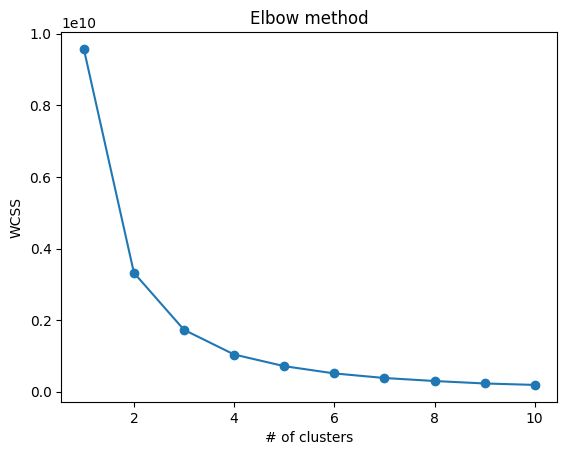

In [47]:
from sklearn.cluster import KMeans

WCSS = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_encoded)
    WCSS.append(kmeans.inertia_)

plt.plot(range(1, 11), WCSS, marker='o')
plt.xlabel("# of clusters")
plt.ylabel("WCSS")
plt.title("Elbow method")

In [46]:
from sklearn.metrics import silhouette_score
for i in range(2, 8):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_encoded)
    score = silhouette_score(df_encoded, kmeans.labels_)
    print(i, ' - ', score)

2  -  0.6136388585242976
3  -  0.5573785087271325
4  -  0.5492495976881347
5  -  0.5339404200909765
6  -  0.5318377515703524
7  -  0.5325131469011867
